In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('./data/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [6]:
df = df.drop_duplicates(subset='date_time', ignore_index=True)

In [7]:
df.shape

(40575, 9)

In [8]:
date_range = list(pd.date_range('2012-10-02 09:00:00', '2018-09-30 23:00:00', freq='H'))
print(len(date_range))

52551


In [9]:
new_df = pd.DataFrame({'date_time': date_range})
new_df.head()

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00


In [10]:
full_df = pd.merge(new_df, df, how='left', on='date_time')

In [11]:
full_df.shape

(52551, 9)

In [12]:
full_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40.0,Clouds,scattered clouds,5545.0
1,2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75.0,Clouds,broken clouds,4516.0
2,2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90.0,Clouds,overcast clouds,4767.0
3,2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90.0,Clouds,overcast clouds,5026.0
4,2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75.0,Clouds,broken clouds,4918.0


In [13]:
full_df.isna().sum()

date_time                  0
holiday                52498
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
traffic_volume         11976
dtype: int64

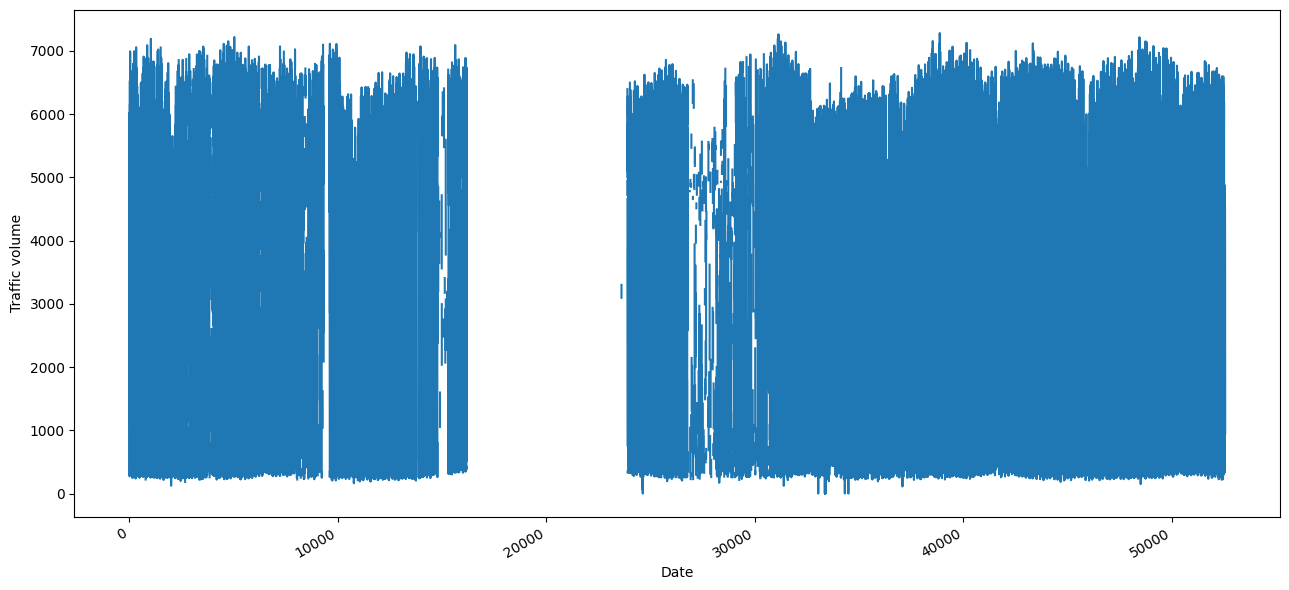

In [14]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(full_df.traffic_volume)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

In [15]:
full_df[35000:].isna().sum()

date_time                  0
holiday                17529
temp                     104
rain_1h                  104
snow_1h                  104
clouds_all               104
weather_main             104
weather_description      104
traffic_volume           104
dtype: int64

In [16]:
full_df = full_df[35000:].reset_index(drop=True)

In [17]:
full_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2016-09-29 17:00:00,NaN,291.75,0.0,0.0,0.0,Clear,Sky is Clear,5551.0
1,2016-09-29 18:00:00,NaN,290.36,0.0,0.0,0.0,Clear,Sky is Clear,4132.0
2,2016-09-29 19:00:00,NaN,287.86,0.0,0.0,0.0,Clear,Sky is Clear,3435.0
3,2016-09-29 20:00:00,NaN,285.91,0.0,0.0,0.0,Clear,Sky is Clear,2765.0
4,2016-09-29 21:00:00,NaN,284.31,0.0,0.0,0.0,Clear,Sky is Clear,2443.0


In [18]:
full_df = full_df.drop(['holiday', 'weather_main', 'weather_description'], axis=1)
full_df.shape

(17551, 6)

In [19]:
full_df = full_df.fillna(full_df.groupby(full_df.date_time.dt.hour).transform('median'))

In [20]:
full_df.isna().sum()

date_time         0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
traffic_volume    0
dtype: int64

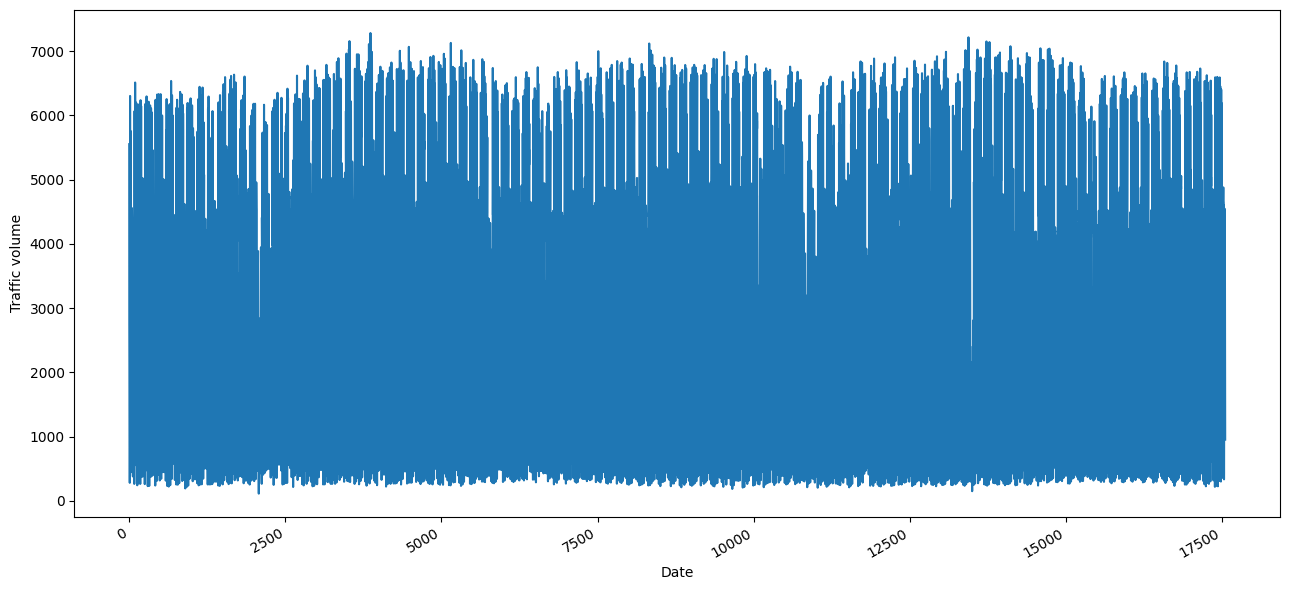

In [21]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(full_df.traffic_volume)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

In [26]:
full_df.to_csv('./data/metro_interstate_traffic_volume_preprocessed.csv', index=False, header=True)